In [3]:
z = -1.8-1.8j
print(abs(z))

2.545584412271571


In [4]:
c = -0.62772-0.42193j
z = 0+0j
for n in range(9):
    z = z*z + c
    print(f"{n}: z={z: .5f}, abs(z)={abs(z):0.3f}, c={c: .5f}")

0: z=-0.62772-0.42193j, abs(z)=0.756, c=-0.62772-0.42193j
1: z=-0.41171+0.10778j, abs(z)=0.426, c=-0.62772-0.42193j
2: z=-0.46983-0.51068j, abs(z)=0.694, c=-0.62772-0.42193j
3: z=-0.66777+0.05793j, abs(z)=0.670, c=-0.62772-0.42193j
4: z=-0.18516-0.49930j, abs(z)=0.533, c=-0.62772-0.42193j
5: z=-0.84274-0.23703j, abs(z)=0.875, c=-0.62772-0.42193j
6: z= 0.02630-0.02242j, abs(z)=0.035, c=-0.62772-0.42193j
7: z=-0.62753-0.42311j, abs(z)=0.757, c=-0.62772-0.42193j
8: z=-0.41295+0.10910j, abs(z)=0.427, c=-0.62772-0.42193j


In [5]:
"""Julia set generator without optional PIL-based image drawing"""
import time

# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

In [8]:
def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    assert sum(output) == 33219980

In [9]:
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

In [12]:
if __name__ == "__main__":
    # Calculate the Julia set using a pure Python solution with
    # reasonable defaults for a laptop
    calc_pure_python(desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 8.052938222885132 seconds


TypeError: 'float' object cannot be interpreted as an integer

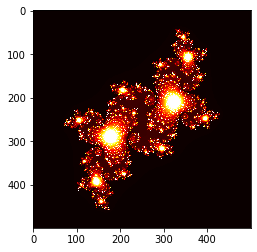

In [17]:
#code from: https://scipython.com/book/chapter-7-matplotlib/problems/p72/the-julia-set/


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Image width and height; parameters for the plot
im_width, im_height = 500, 500
c = complex(-0.1, 0.65)
zabs_max = 10
nit_max = 1000
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

julia = np.zeros((im_width, im_height))
for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 + c
            nit += 1
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio

fig, ax = plt.subplots()
ax.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
xtick_labels = np.linspace(xmin, xmax, xwidth / 0.5)
ax.set_xticks([(x-xmin) / xwidth * im_width for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, yheight / 0.5)
ax.set_yticks([(y-ymin) / yheight * im_height for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])
plt.show()

In [21]:
from functools import wraps

def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
        return result
    return measure_time

@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    ...